In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd;
from scipy.stats import zscore
import torch as torch;

import numpy as np

import torchvision.datasets as datasets
import torchvision.models as models
from torchvision import transforms

import torch.nn as nn;
import torch.nn.functional as F;

np.random.seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


#read in the dataset, convert to numpy

num_classes=10;

transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])])

full_train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, 
                             transform=transform )
full_test_dataset = datasets.CIFAR10(root='./data', train=False, download=True,
                             transform=transform )

batch_size=64;

trainloader = torch.utils.data.DataLoader(full_train_dataset, batch_size=batch_size,shuffle=True)
testloader = torch.utils.data.DataLoader(full_test_dataset, batch_size=batch_size,shuffle=False)


model = models.resnet18(pretrained=True).to(device)

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes).to(device)

#print(model)

criterion = F.nll_loss;
# this optimizer will do gradient descent for us
# experiment with learning rate and optimizer type
learning_rate = 0.0001;
# note that we have to add all weights&biases, for both layers, to the optimizer
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

n_epochs = 30;
num_updates = n_epochs*int(np.ceil(len(trainloader.dataset)/batch_size))
print(num_updates)
warmup_steps=200;
def warmup_linear(x):
    if x < warmup_steps:
        lr=x/warmup_steps
    else:
        lr=max( (num_updates - x ) / (num_updates - warmup_steps), 0.)
    return lr;
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, warmup_linear);

# experiment with batch size (small batch size needs small learning rate)


for i in range(n_epochs):

    for j, data in enumerate(trainloader):
      
        inputs, labels = data        
        inputs=inputs.to(device);
        labels=labels.to(device);
        
        optimizer.zero_grad();

        outputs = F.log_softmax(model(inputs),dim=1);
        risk = criterion(outputs, labels);
  
        # calculate gradients
        risk.backward();
        
        # take the gradient step
        optimizer.step();
        scheduler.step();
        

        batch_risk=risk.item();
    with (torch.no_grad()):
      correct = 0;
      for j, data in enumerate(testloader):
        
          inputs, labels = data        
          inputs=inputs.to(device);
          labels=labels.to(device);
          outputs = F.log_softmax(model(inputs),dim=1);
          pred = outputs.data.max(dim=1, keepdim=True)[1]
          correct += pred.eq(labels.data.view_as(pred)).sum().item();
    print(i, batch_risk, correct / len(testloader.dataset))

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

23460
0 0.9427732229232788 0.7394
1 1.0594162940979004 0.7786
2 0.6449946761131287 0.7872
3 0.6313188076019287 0.7975
4 0.8124101161956787 0.8024
5 0.0783066675066948 0.8013
6 0.39924538135528564 0.7946
7 0.8911483883857727 0.7999
8 0.4097476005554199 0.8061
9 0.1175525113940239 0.8073
10 0.40585312247276306 0.8027
11 0.69148188829422 0.8099
12 1.2169265747070312 0.8134
13 1.4764341115951538 0.8095
14 0.21360868215560913 0.8134
15 0.37984374165534973 0.8113
16 1.3906623125076294 0.8128
17 0.0009613877045921981 0.8178
18 0.006218236405402422 0.8155
19 0.5609932541847229 0.8211
20 0.004757793620228767 0.8181
21 0.022195057943463326 0.8228
22 0.04180380329489708 0.821
23 0.03485429286956787 0.8216
24 0.11330772191286087 0.8234
25 0.08676323294639587 0.8231
26 0.009917221032083035 0.827
27 0.24875928461551666 0.8259
28 0.6116897463798523 0.8263
29 0.011477516032755375 0.8252


**Plot of the accuracy during epochs of training**

In [ ]:
#Save values of accuracy to plot graph



#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd;
from scipy.stats import zscore
import torch as torch;

import numpy as np

import torchvision.datasets as datasets
import torchvision.models as models
from torchvision import transforms

import torch.nn as nn;
import torch.nn.functional as F;

np.random.seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
epochs=range(0,30)
accuracy_list=[]
a1=[]

#read in the dataset, convert to numpy

num_classes=10;

transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])])

full_train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, 
                             transform=transform )
full_test_dataset = datasets.CIFAR10(root='./data', train=False, download=True,
                             transform=transform )

batch_size=64;

trainloader = torch.utils.data.DataLoader(full_train_dataset, batch_size=batch_size,shuffle=True)
testloader = torch.utils.data.DataLoader(full_test_dataset, batch_size=batch_size,shuffle=False)


model = models.resnet18(pretrained=True).to(device)

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes).to(device)

#print(model)

criterion = F.nll_loss;
# this optimizer will do gradient descent for us
# experiment with learning rate and optimizer type
learning_rate = 0.0001;
# note that we have to add all weights&biases, for both layers, to the optimizer
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

n_epochs = 30;
num_updates = n_epochs*int(np.ceil(len(trainloader.dataset)/batch_size))
print(num_updates)
warmup_steps=200;
def warmup_linear(x):
    if x < warmup_steps:
        lr=x/warmup_steps
    else:
        lr=max( (num_updates - x ) / (num_updates - warmup_steps), 0.)
    return lr;
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, warmup_linear);

# experiment with batch size (small batch size needs small learning rate)


for i in range(n_epochs):

    for j, data in enumerate(trainloader):
      
        inputs, labels = data        
        inputs=inputs.to(device);
        labels=labels.to(device);
        
        optimizer.zero_grad();

        outputs = F.log_softmax(model(inputs),dim=1);
        risk = criterion(outputs, labels);
  
        # calculate gradients
        risk.backward();
        
        # take the gradient step
        optimizer.step();
        scheduler.step();
        

        batch_risk=risk.item();
    with (torch.no_grad()):
      correct = 0;
      for j, data in enumerate(testloader):
        
          inputs, labels = data        
          inputs=inputs.to(device);
          labels=labels.to(device);
          outputs = F.log_softmax(model(inputs),dim=1);
          pred = outputs.data.max(dim=1, keepdim=True)[1]
          correct += pred.eq(labels.data.view_as(pred)).sum().item();    
    accuracy = correct / len(testloader.dataset)
    #print(i, batch_risk, correct / len(testloader.dataset))
        
    a1.append(accuracy)
accuracy_list.append(a1)

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


23460


In [ ]:
dict1={}
dict1["Pretrained=True"]=accuracy_list[0]
#print(dict1)

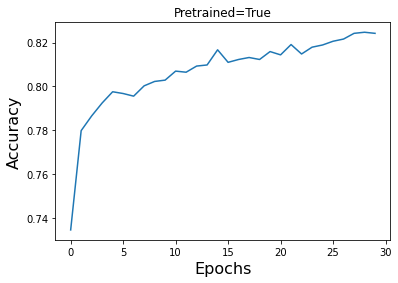

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(epochs,dict1["Pretrained=True"])
plt.title('Pretrained=True')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.show()

# **Experimenting with different learning rates, keeping same number of epochs**



In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd;
from scipy.stats import zscore
import torch as torch;

import numpy as np

import torchvision.datasets as datasets
import torchvision.models as models
from torchvision import transforms

import torch.nn as nn;
import torch.nn.functional as F;

np.random.seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


#read in the dataset, convert to numpy

num_classes=10;

transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])])

full_train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, 
                             transform=transform )
full_test_dataset = datasets.CIFAR10(root='./data', train=False, download=True,
                             transform=transform )

batch_size=64;

trainloader = torch.utils.data.DataLoader(full_train_dataset, batch_size=batch_size,shuffle=True)
testloader = torch.utils.data.DataLoader(full_test_dataset, batch_size=batch_size,shuffle=False)


model = models.resnet18(pretrained=True).to(device)

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes).to(device)

#print(model)

criterion = F.nll_loss;
# this optimizer will do gradient descent for us
# experiment with learning rate and optimizer type
learning_rate = 0.00001;
# note that we have to add all weights&biases, for both layers, to the optimizer
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

n_epochs = 30;
num_updates = n_epochs*int(np.ceil(len(trainloader.dataset)/batch_size))
print(num_updates)
warmup_steps=200;
def warmup_linear(x):
    if x < warmup_steps:
        lr=x/warmup_steps
    else:
        lr=max( (num_updates - x ) / (num_updates - warmup_steps), 0.)
    return lr;
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, warmup_linear);

# experiment with batch size (small batch size needs small learning rate)


for i in range(n_epochs):

    for j, data in enumerate(trainloader):
      
        inputs, labels = data        
        inputs=inputs.to(device);
        labels=labels.to(device);
        
        optimizer.zero_grad();

        outputs = F.log_softmax(model(inputs),dim=1);
        risk = criterion(outputs, labels);
  
        # calculate gradients
        risk.backward();
        
        # take the gradient step
        optimizer.step();
        scheduler.step();
        

        batch_risk=risk.item();
    with (torch.no_grad()):
      correct = 0;
      for j, data in enumerate(testloader):
        
          inputs, labels = data        
          inputs=inputs.to(device);
          labels=labels.to(device);
          outputs = F.log_softmax(model(inputs),dim=1);
          pred = outputs.data.max(dim=1, keepdim=True)[1]
          correct += pred.eq(labels.data.view_as(pred)).sum().item();
    print(i, batch_risk, correct / len(testloader.dataset))

Files already downloaded and verified
Files already downloaded and verified
23460
0 1.6057074069976807 0.5343
1 0.8116387128829956 0.6347
2 0.6447538137435913 0.6722
3 1.1283833980560303 0.6953
4 0.797541618347168 0.7116
5 1.8114036321640015 0.7226
6 0.5271031260490417 0.7324
7 0.6721956133842468 0.7367
8 0.5966244339942932 0.742
9 1.4107633829116821 0.7472
10 0.9123853445053101 0.7486
11 0.5902101993560791 0.7529
12 0.8381452560424805 0.7537
13 1.073493480682373 0.7536
14 0.6513474583625793 0.7557
15 0.3333662152290344 0.7572
16 0.14241923391819 0.7578
17 1.1556618213653564 0.7575
18 0.7849724292755127 0.7582
19 0.6592441201210022 0.7579
20 1.1858851909637451 0.7583
21 0.7605464458465576 0.7572
22 0.8690956234931946 0.7566
23 0.3331829309463501 0.7584
24 0.8447769284248352 0.7581
25 0.4482067823410034 0.7574
26 0.3433884382247925 0.7565
27 0.9741051197052002 0.7573
28 0.18631529808044434 0.7578
29 0.7798391580581665 0.7582


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd;
from scipy.stats import zscore
import torch as torch;

import numpy as np

import torchvision.datasets as datasets
import torchvision.models as models
from torchvision import transforms

import torch.nn as nn;
import torch.nn.functional as F;

np.random.seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


#read in the dataset, convert to numpy

num_classes=10;

transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])])

full_train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, 
                             transform=transform )
full_test_dataset = datasets.CIFAR10(root='./data', train=False, download=True,
                             transform=transform )

batch_size=64;

trainloader = torch.utils.data.DataLoader(full_train_dataset, batch_size=batch_size,shuffle=True)
testloader = torch.utils.data.DataLoader(full_test_dataset, batch_size=batch_size,shuffle=False)


model = models.resnet18(pretrained=True).to(device)

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes).to(device)

#print(model)

criterion = F.nll_loss;
# this optimizer will do gradient descent for us
# experiment with learning rate and optimizer type
learning_rate = 0.01;
# note that we have to add all weights&biases, for both layers, to the optimizer
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

n_epochs = 30;
num_updates = n_epochs*int(np.ceil(len(trainloader.dataset)/batch_size))
print(num_updates)
warmup_steps=200;
def warmup_linear(x):
    if x < warmup_steps:
        lr=x/warmup_steps
    else:
        lr=max( (num_updates - x ) / (num_updates - warmup_steps), 0.)
    return lr;
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, warmup_linear);

# experiment with batch size (small batch size needs small learning rate)


for i in range(n_epochs):

    for j, data in enumerate(trainloader):
      
        inputs, labels = data        
        inputs=inputs.to(device);
        labels=labels.to(device);
        
        optimizer.zero_grad();

        outputs = F.log_softmax(model(inputs),dim=1);
        risk = criterion(outputs, labels);
  
        # calculate gradients
        risk.backward();
        
        # take the gradient step
        optimizer.step();
        scheduler.step();
        

        batch_risk=risk.item();
    with (torch.no_grad()):
      correct = 0;
      for j, data in enumerate(testloader):
        
          inputs, labels = data        
          inputs=inputs.to(device);
          labels=labels.to(device);
          outputs = F.log_softmax(model(inputs),dim=1);
          pred = outputs.data.max(dim=1, keepdim=True)[1]
          correct += pred.eq(labels.data.view_as(pred)).sum().item();
    print(i, batch_risk, correct / len(testloader.dataset))

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

23460
0 1.2140839099884033 0.6073
1 1.3419808149337769 0.6733
2 1.5669307708740234 0.7107
3 0.9023218154907227 0.7377
4 0.8105514049530029 0.7557
5 0.32515713572502136 0.7632
6 0.498587042093277 0.7639
7 0.3565507233142853 0.771
8 0.30714520812034607 0.7706
9 0.18550951778888702 0.7688
10 0.21115165948867798 0.7805
11 0.04781777039170265 0.7715
12 0.17002379894256592 0.7713
13 0.09463758766651154 0.7706
14 0.20068156719207764 0.7745
15 0.00034635895281098783 0.7736
16 0.06494003534317017 0.7766
17 0.04893789067864418 0.7785
18 0.29904913902282715 0.772
19 0.1018572747707367 0.7749
20 0.005717720370739698 0.7823
21 0.2052605152130127 0.7806
22 0.059321559965610504 0.7912
23 0.00830264575779438 0.7824
24 0.010582376271486282 0.7828
25 0.12482914328575134 0.7866
26 0.007912924513220787 0.7859
27 0.00016304969904012978 0.7893
28 0.0666910856962204 0.7917
29 0.005682755261659622 0.7913
